**Sentimental Analysis on Google News ( Russia-Ukraine War)**

importing libraries

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [137]:
!pip install GoogleNews

In [138]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()
googlenews.set_lang('en')

Selecting News on "Russia-Ukraine War" Latest News 

In [139]:
# Get last 4 weeks Russia-Ukraine War google news
googlenews.get_news('Russia-Ukraine War')  
googlenews.set_time_range('02/12/2022','03/06/2022')

News Results:

In [140]:
results=googlenews.results()
results

[{'date': '7 hours ago',
  'datetime': datetime.datetime(2022, 3, 6, 22, 33, 18, 552810),
  'desc': 'bookmark_border',
  'img': 'https://lh3.googleusercontent.com/proxy/Ad_2ayycxmqf75WvIfNk5Si9gPauB9e8VVLJM-keMltGasTWFRx8c7puJpc6s1zexHc72_GTSlLl9HjiPbtHNANJ0_UwVWIYpFWE0epOFXn_NOBS6P-AlZZ3k_-tC78v42bIyLSpNszq6lzUu_1nd5PC2k1ecGcrVHw7WIdo4M-zgWOBMlqXDWG4nMq8Qk3uex-A3DADNlfp4g=s0-w100-h100-dcgXCQy7AG',
  'link': 'news.google.com/./articles/CAIiEMpU5hj8FAfc_nJqkfFqkoIqFwgEKg4IACoGCAow9vBNMK3UCDCFpJYH?uo=CAUiWGh0dHBzOi8vd3d3Lm5wci5vcmcvMjAyMi8wMy8wNi8xMDg0ODE3Mzg2L3J1c3NpYS11a3JhaW5lLXdhci13aGF0LWhhcHBlbmVkLXRvZGF5LW1hcmNoLTbSAQA&hl=en-US&gl=US&ceid=US%3Aen',
  'media': None,
  'site': 'NPR',
  'title': 'Russia-Ukraine war: What happened today (March 6)'},
 {'date': '29 minutes ago',
  'datetime': None,
  'desc': 'bookmark_border',
  'img': 'https://lh3.googleusercontent.com/proxy/7xctMmXCST-JHYrSEVetOzfnOQ4xwRcUeKw5FZ8dVId8VruorWHB0f9johF_G8zFm6kLrDnQj5ZlMLIR56qTaCD06tRFb0oObp-NfsDu5K1W45tf

Getting News headlines



In [141]:
headlines=googlenews.get_texts()
headlines

['Russia-Ukraine war: What happened today (March 6)',
 'Oil prices jump amid Russia-Ukraine conflict; Biden administration requests $10B in Ukraine aid: Live updates',
 'Latest Russia-Ukraine war news: Live updates',
 'Russian invasion displaces Ukrainians who fled Donbas conflict',
 'Russia-Ukraine war: Mariupol evacuation halted for second day',
 'Russia blocks news sites over Ukraine war coverage: Rights group',
 'Latest Russia-Ukraine news: Plane carrying Russian diplomats expelled from US leave JFK for Moscow',
 "Putin's Ukraine Invasion 'Strategic Catastrophe' for Russia, Top US Envoy Says",
 'Ukraine war: what we know on day 12 of the Russian invasion',
 'Ukrainians Find That Relatives in Russia Don’t Believe It’s a War',
 'Russia-Ukraine war: what we know on day 11 of the Russian invasion',
 'Russia-Ukraine War, Latest News Update: March 5, 2022',
 'Russia-Ukraine war: CNN, Bloomberg suspend work in Moscow',
 'Russia-Ukraine war: What happened today (March 4)',
 'War in Ukraine

In [142]:
columns = [ 'Headline']
NewsHeadlines = pd.DataFrame(headlines, columns=columns)
NewsHeadlines

,Headline
0,Russia-Ukraine war: What happened today (March 6)
1,Oil prices jump amid Russia-Ukraine conflict; ...
2,Latest Russia-Ukraine war news: Live updates
3,Russian invasion displaces Ukrainians who fled...
4,Russia-Ukraine war: Mariupol evacuation halted...
...,...
93,Opinion | Russia's Ukraine Invasion: This Cold...
94,What Happened on Day 5 of Russia’s Invasion of...
95,Russia Warns Countries Against Hosting Ukraine...
96,"Amid Russia-Ukraine war, Georgia to ‘immediate..."


Removing Stop words from the headlines

In [143]:
## remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
NewsHeadlines['Headline'][2]

'Latest Russia-Ukraine war news: Live updates'

Removing Punctuations:

In [144]:
## remove punctuation
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [145]:
most = pd.Series(' '.join(NewsHeadlines['Headline']).split()).value_counts()[:10]
most

RussiaUkraine    47
Ukraine          45
war              40
Russia           19
War              17
Russian          15
invasion         14
What              9
US                8
Russias           8
dtype: int64

In [146]:
most = list(most.index)
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in most))
NewsHeadlines['Headline'].head()

0                               happened today March 6
1    Oil prices jump amid conflict Biden administra...
2                             Latest news Live updates
3            displaces Ukrainians fled Donbas conflict
4                Mariupol evacuation halted second day
Name: Headline, dtype: object

In [147]:
from textblob import TextBlob
TextBlob(NewsHeadlines['Headline'][1]).words

WordList(['Oil', 'prices', 'jump', 'amid', 'conflict', 'Biden', 'administration', 'requests', '10B', 'aid', 'Live', 'updates'])

In [148]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [149]:
NewsHeadlines['Headline'][4]

'mariupol evacu halt second day'

**wordcloud**

In [150]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

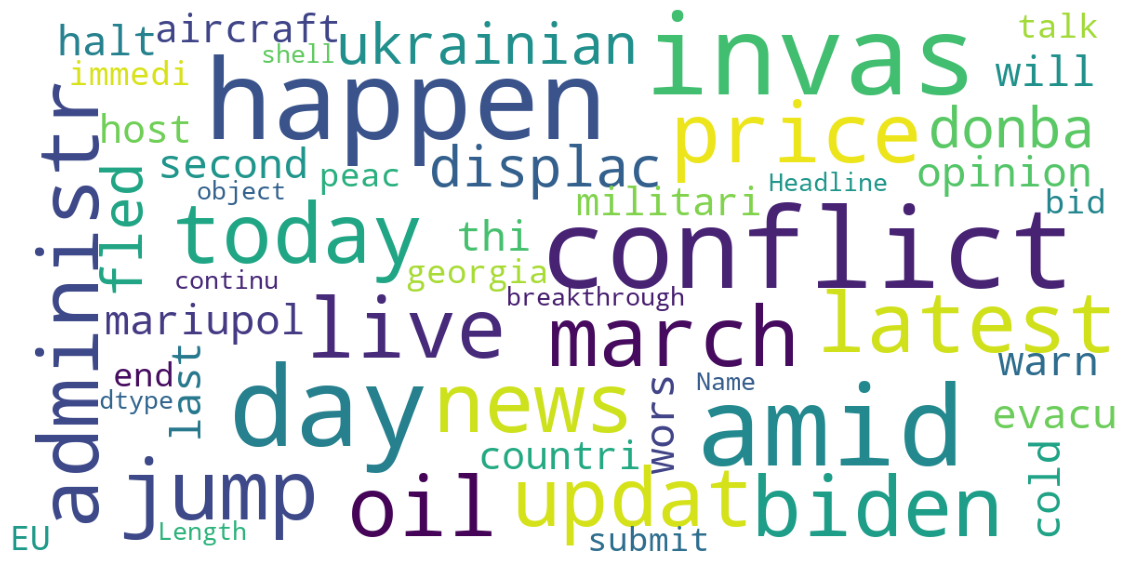

In [151]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=800,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=24)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(NewsHeadlines['Headline'])

Importing Sentiment Analyzer

In [152]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [153]:
analyzer = SentimentIntensityAnalyzer()

In [154]:
# Use polarity_scores method of Sentiment Intensity Analyzer to get sentiment scores
sentiment_scores = NewsHeadlines['Headline'].apply(analyzer.polarity_scores).tolist()

Sentiment Scores:

In [155]:
sentiment_scores = pd.DataFrame(sentiment_scores)
print("Overall sentiment dictionary is :\n  ")
print(sentiment_scores)

Overall sentiment dictionary is :
  
      neg    neu  pos  compound
0   0.000  1.000  0.0    0.0000
1   0.173  0.827  0.0   -0.3182
2   0.000  1.000  0.0    0.0000
3   0.365  0.635  0.0   -0.3182
4   0.000  1.000  0.0    0.0000
..    ...    ...  ...       ...
93  0.000  1.000  0.0    0.0000
94  0.000  1.000  0.0    0.0000
95  0.219  0.781  0.0   -0.1027
96  0.000  1.000  0.0    0.0000
97  0.000  1.000  0.0    0.0000

[98 rows x 4 columns]


In [156]:
sentiment_value=[] 
 # decide sentiment as positive, negative and neutral
for i in  sentiment_scores['compound']:
   
    if  i >= 0.05  :
        sentiment_value.append( "Positive")
 
    elif i  <= - 0.05 :
        sentiment_value.append( "Negative")
 
    else :
        sentiment_value.append("Neutral")

In [157]:
NewsHeadlines['Sentiment value']=(sentiment_value)
NewsHeadlines

,Headline,Sentiment value
0,happen today march 6,Neutral
1,oil price jump amid conflict biden administr r...,Negative
2,latest news live updat,Neutral
3,displac ukrainian fled donba conflict,Negative
4,mariupol evacu halt second day,Neutral
...,...,...
93,opinion invas thi cold will Be wors than last,Neutral
94,happen day 5 invas,Neutral
95,warn countri against host militari aircraft,Negative
96,amid georgia immedi submit EU bid,Neutral


**Russia - Ukraine issues  News before War (2012-2021)**

In [158]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()

In [159]:
googlenews = GoogleNews(lang='en', region='US')

Fetching the news from 2012 to 2021 Feb

In [160]:
googlenews = GoogleNews(start='02/01/2012',end='02/28/2021')

In [161]:
googlenews.search('Russia-Ukraine war')

In [162]:
#googlenews.get_page(2)

In [163]:
googlenews.total_count()

228000000

News Results

In [164]:
googlenews.results()

[{'date': 'Sep 11, 2014',
  'datetime': datetime.datetime(2014, 9, 11, 0, 0),
  'desc': 'Already a member? ... In March, the Russian army seized Crimea. Last week, \nit routed Ukrainian forces in east Ukraine. Ukrainian president Petro \nPoroshenko asked...',
  'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
  'link': 'https://euobserver.com/opinion/125547',
  'media': 'EUobserver',
  'title': 'Who won the Russia-Ukraine war?'},
 {'date': 'Sep 9, 2014',
  'datetime': datetime.datetime(2014, 9, 9, 0, 0),
  'desc': 'Ukraine Town Bears Scars of Russian Offensive That Turned Tide in Conflict \n... After Russian units bombarded Ukraine forces around Ilovaisk, a \nUkrainian...',
  'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
  'link': 'https://www.nytimes.com/2014/09/10/world/europe/ukraine-town-bears-scars-of-russian-offensive-that-turned-tide-in-conflict.html',
  'media': 'The New York Times',
  't

In [165]:
googlenews.results(sort=True)

'<' not supported between instances of 'NoneType' and 'datetime.datetime'


[{'date': 'Sep 11, 2014',
  'datetime': datetime.datetime(2014, 9, 11, 0, 0),
  'desc': 'Already a member? ... In March, the Russian army seized Crimea. Last week, \nit routed Ukrainian forces in east Ukraine. Ukrainian president Petro \nPoroshenko asked...',
  'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
  'link': 'https://euobserver.com/opinion/125547',
  'media': 'EUobserver',
  'title': 'Who won the Russia-Ukraine war?'},
 {'date': 'Sep 9, 2014',
  'datetime': datetime.datetime(2014, 9, 9, 0, 0),
  'desc': 'Ukraine Town Bears Scars of Russian Offensive That Turned Tide in Conflict \n... After Russian units bombarded Ukraine forces around Ilovaisk, a \nUkrainian...',
  'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==',
  'link': 'https://www.nytimes.com/2014/09/10/world/europe/ukraine-town-bears-scars-of-russian-offensive-that-turned-tide-in-conflict.html',
  'media': 'The New York Times',
  't

In [166]:
googlenews.get_texts()

['Who won the Russia-Ukraine war?',
 'Ukraine Town Bears Scars of Russian Offensive That Turned Tide in Conflict',
 'Ukraine fights off attack on Donetsk airport by pro-Russia forces',
 "Russia's conflict with Ukraine: An explainer",
 "Ukraine president warns Russia tensions could lead to 'full-scale war'",
 'UN urges Russia and Ukraine to step away from further ...',
 'Henry Kissinger: To settle the Ukraine crisis, start at the end',
 "It's not Russia that's pushed Ukraine to the brink of war",
 'Ukraine: Everything you need to know about how we got here',
 "Did Russia just invade Ukraine? What we know and don't know"]

Getting News links

In [167]:
googlenews.get_links()

['https://euobserver.com/opinion/125547',
 'https://www.nytimes.com/2014/09/10/world/europe/ukraine-town-bears-scars-of-russian-offensive-that-turned-tide-in-conflict.html',
 'https://www.theguardian.com/world/2014/sep/13/vladimir-putin-wants-destroy-ukraine-says-arseny-yetseniuk',
 'https://www.militarytimes.com/news/your-military/2018/11/26/russias-conflict-with-ukraine-an-explainer/',
 'https://www.theguardian.com/world/2018/nov/27/russia-to-charge-ukrainian-sailors-as-kerch-crisis-deepens',
 'https://news.un.org/en/story/2018/11/1026601',
 'https://www.washingtonpost.com/opinions/henry-kissinger-to-settle-the-ukraine-crisis-start-at-the-end/2014/03/05/46dad868-a496-11e3-8466-d34c451760b9_story.html',
 'https://www.theguardian.com/commentisfree/2014/apr/30/russia-ukraine-war-kiev-conflict',
 'https://www.cnn.com/2015/02/10/europe/ukraine-war-how-we-got-here/index.html',
 'https://www.vox.com/2014/8/15/6006281/russia-ukraine-war-what-we-know']

Getting News Headlines

In [168]:
headlines=googlenews.get_texts()
headlines

['Who won the Russia-Ukraine war?',
 'Ukraine Town Bears Scars of Russian Offensive That Turned Tide in Conflict',
 'Ukraine fights off attack on Donetsk airport by pro-Russia forces',
 "Russia's conflict with Ukraine: An explainer",
 "Ukraine president warns Russia tensions could lead to 'full-scale war'",
 'UN urges Russia and Ukraine to step away from further ...',
 'Henry Kissinger: To settle the Ukraine crisis, start at the end',
 "It's not Russia that's pushed Ukraine to the brink of war",
 'Ukraine: Everything you need to know about how we got here',
 "Did Russia just invade Ukraine? What we know and don't know"]

In [169]:
columns = [ 'Headline']
NewsHeadlines = pd.DataFrame(headlines, columns=columns)
NewsHeadlines

,Headline
0,Who won the Russia-Ukraine war?
1,Ukraine Town Bears Scars of Russian Offensive ...
2,Ukraine fights off attack on Donetsk airport b...
3,Russia's conflict with Ukraine: An explainer
4,Ukraine president warns Russia tensions could ...
5,UN urges Russia and Ukraine to step away from ...
6,"Henry Kissinger: To settle the Ukraine crisis,..."
7,It's not Russia that's pushed Ukraine to the b...
8,Ukraine: Everything you need to know about how...
9,Did Russia just invade Ukraine? What we know a...


Removing Stop words from the headlines

In [170]:
## remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
NewsHeadlines['Headline'][2]

'Ukraine fights attack Donetsk airport pro-Russia forces'

Removing Punctuations:

In [171]:
## remove punctuation
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [172]:
most = pd.Series(' '.join(NewsHeadlines['Headline']).split()).value_counts()[:10]
most

Ukraine    9
Russia     4
war        3
know       3
Who        1
start      1
UN         1
urges      1
step       1
away       1
dtype: int64

In [173]:
most = list(most.index)
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in most))
NewsHeadlines['Headline'].head()

0                                        RussiaUkraine
1    Town Bears Scars Russian Offensive That Turned...
2       fights attack Donetsk airport proRussia forces
3                        Russias conflict An explainer
4        president warns tensions could lead fullscale
Name: Headline, dtype: object

In [174]:
from textblob import TextBlob
TextBlob(NewsHeadlines['Headline'][1]).words

WordList(['Town', 'Bears', 'Scars', 'Russian', 'Offensive', 'That', 'Turned', 'Tide', 'Conflict'])

In [175]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [176]:
NewsHeadlines['Headline'][4]

'presid warn tension could lead fullscal'

Word cloud

In [177]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

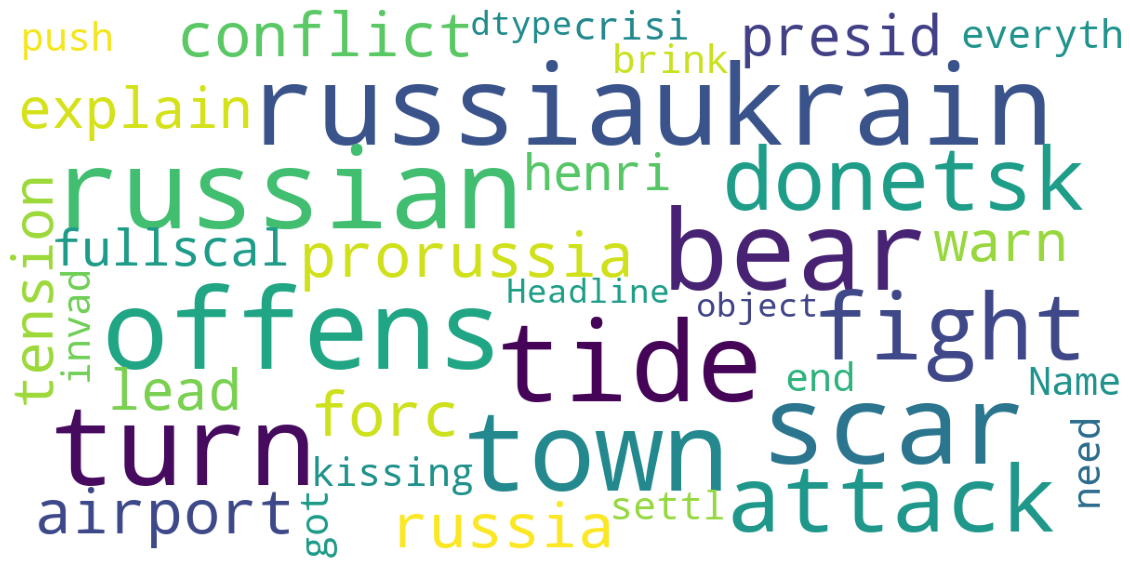

In [178]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=800,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=24)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(NewsHeadlines['Headline'])

Importing Sentiment Analyzer

In [179]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [180]:
analyzer = SentimentIntensityAnalyzer()

In [181]:
# Use polarity_scores method of Sentiment Intensity Analyzer to get sentiment scores
sentiment_scores = NewsHeadlines['Headline'].apply(analyzer.polarity_scores).tolist()

Sentiment Scores

In [182]:
sentiment_scores = pd.DataFrame(sentiment_scores)
print("Overall sentiment dictionary is :\n  ")
print(sentiment_scores)

Overall sentiment dictionary is :
  
     neg    neu    pos  compound
0  0.000  1.000  0.000    0.0000
1  0.223  0.777  0.000   -0.3182
2  0.588  0.412  0.000   -0.6908
3  0.434  0.566  0.000   -0.3182
4  0.481  0.519  0.000   -0.4019
5  0.000  0.000  0.000    0.0000
6  0.000  0.575  0.425    0.5719
7  0.000  1.000  0.000    0.0000
8  0.000  1.000  0.000    0.0000
9  0.000  1.000  0.000    0.0000


In [183]:
sentiment_value=[] 
 # decide sentiment as positive, negative and neutral
for i in  sentiment_scores['compound']:
   
    if  i >= 0.05  :
        sentiment_value.append( "Positive")
 
    elif i  <= - 0.05 :
        sentiment_value.append( "Negative")
 
    else :
        sentiment_value.append("Neutral")

In [184]:
NewsHeadlines['Sentiment value']=(sentiment_value)
NewsHeadlines

,Headline,Sentiment value
0,russiaukrain,Neutral
1,town bear scar russian offens that turn tide c...,Negative
2,fight attack donetsk airport prorussia forc,Negative
3,russia conflict An explain,Negative
4,presid warn tension could lead fullscal,Negative
5,,Neutral
6,henri kissing To settl crisi end,Positive
7,it that push brink,Neutral
8,everyth need got,Neutral
9,did invad what,Neutral
